# Welcome to 3rd hands-on session!

## Brief outline:
- Feature descriptors
- Face detection
- Basics of video processing

$Note:$ The images for the exercises are given in the "images" folder!

## 1] Feature descriptors

$\textbf{Image Features:}$ Uniquely characterizes/describes the image. Different image features are available like SIFT, SURF, ORB, etc.

<font color=red>
Q1] Compute the SIFT features and display the keypoints for the image "house.jpg".
</font>

$\textbf{SIFT (Scale-Invariant Feature Transform):}$ SIFT helps in detecting salient, stable feature points in an image. SIFT is invariant to different transformations of the image such as rotation, scaling, illumination etc. It consists of the following $4$ major steps:
- $\textbf{Scale-space Extrema Detection}$: Detects blobs of various sizes (scale-invariance) using Difference of Gaussians (DoG). Every pixel in an image is compared with its 8 neighbours as well as 9 pixels in next scale and 9 pixels in previous scales. If it is a local extrema, it is a potential keypoint.
- $\textbf{Keypoint Localization}$: The obtained keypoint locations are refined using (i) contrastThreshold and (ii) edgeThreshold, thus eliminating all the low-contrast keypoints and edge keypoints.
- $\textbf{Orientation Assignment}$: To each potential keypoint, an orientation is assigned (rotation invariance) by considering a neighbourhood around the keypoint. 
- $\textbf{Keypoint Descriptor}$: 128 dimension vector representation which forms the keypoint descriptor.

#### Import all the necessary libraries

In [1]:
import cv2
import numpy as np
import os 
from glob import glob
import matplotlib.pyplot as plt

#### Function to compute SIFT features

In [2]:
def compute_sift(img):
    
    # Initialization
    sift = cv2.xfeatures2d.SIFT_create()

    # Find the keypoints and describe them
    kp, des = sift.detectAndCompute(img, None)        
        
    return kp, des

#### Function to plot the keypoints

In [3]:
def plot_keypoints(img, kp):
    
    img1 = img.copy()
    kp_img = cv2.drawKeypoints(img1, kp, img1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    kp_img = cv2.cvtColor(kp_img, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize = (8, 8))
    plt.title('Keypoints')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(kp_img)
    plt.show()

#### Read the image, compute SIFT and display the keypoints

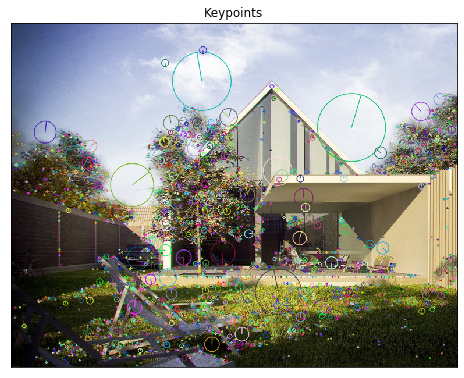

In [4]:
# Read the input image
image = cv2.imread('images/house.jpg')
    
# Compute SIFT features
kp, des = compute_sift(image)

# Plot the keypoints
plot_keypoints(image, kp)

#### Total no. of keypoints detected?

In [5]:
# Find the no. of keypoints detected
num_kp = len(kp)
print("No of kepypoints detected =", num_kp)

No of kepypoints detected = 2584


#### Descriptor size?

In [6]:
# Print the shape of the descriptors
print("Descriptor:", des.shape)

Descriptor: (2584, 128)


<font color=red>
Q2] Compute the SURF features and display the keypoints for the image "house.jpg".
</font>

$\textbf{SURF (Speeded Up Robust Features)}:$ SURF is a speeded-up version of SIFT. Few modifications done like using box-filter instead of DoG of SIFT, wavelet responses for orientation assignment etc to improve the speed and robustness. Analysis shows that SURF is 3 times faster than SIFT while performance is comparable to SIFT. SURF is good at handling images with blurring and rotation, but not good at handling viewpoint change and illumination change.

#### Function to compute SURF descriptors

In [7]:
def compute_surf(img, threshold):
    
    # Initialization
    surf = cv2.xfeatures2d.SURF_create(threshold)

    # Find the keypoints and describe them
    kp, des = surf.detectAndCompute(img, None)        
        
    return kp, des

#### Read the image, compute SURF and display the keypoints

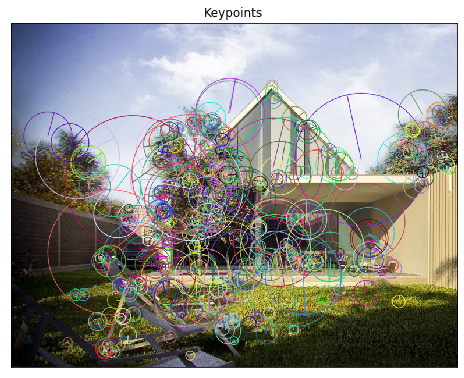

In [8]:
# Read the input image
image = cv2.imread('images/house.jpg')
    
# Define the threshold
threshold=3000

# Compute SIFT features
kp, des = compute_surf(image, threshold)

# Plot the keypoints
plot_keypoints(image, kp)

In [9]:
# Find the no. of keypoints detected
num_kp = len(kp)
print("No of kepypoints detected =", num_kp)

No of kepypoints detected = 496


In [10]:
# Print the shape of the descriptors
print("Descriptor:", des.shape)

Descriptor: (496, 64)


### Variant of SURF: 

#### (i) Extended SURF

The default SURF descriptor is of $64$ dimensions.  Lower the dimension, higher the speed of computation and matching, but provide better distinctiveness of features. For more distinctiveness, SURF feature descriptor has an extended $128$ dimension version.

$\textbf{Implementation}:$ OpenCV supports both the verions, $64$-dim and $128$-dim SURF, using the flag $extended$. If it is 0, 64-dim SURF is computed and if it is set to 1, an extended 128-dim version SURF is computed. 

#### Function to include extended flag in SURF

In [11]:
def compute_surf_extended(img, threshold):
    
    # Initialization
    surf = cv2.xfeatures2d.SURF_create(threshold)

    # Check the extended flag
    print("Default extended flag: ", surf.getExtended())
    surf.setExtended(True)
    print("After setting extended flag: ", surf.getExtended())
    
    # Find the keypoints and describe them
    kp, des = surf.detectAndCompute(img, None)        
        
    return kp, des

#### Read the image, compute extended SURF and display the keypoints

Default extended flag:  False
After setting extended flag:  True


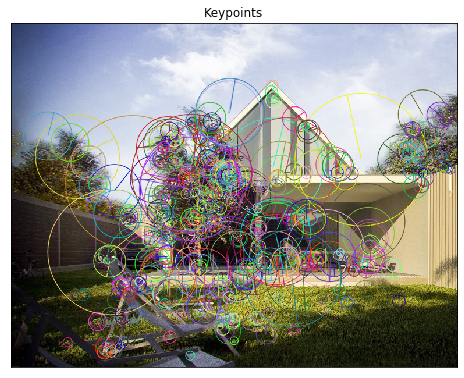

In [12]:
# Read the input image
image = cv2.imread('images/house.jpg')
    
# Define the threshold
threshold=3000

# Compute SURF features
kp, des = compute_surf_extended(image, threshold)

# Plot the keypoints
plot_keypoints(image, kp)

In [13]:
# Print the shape of the descriptors
print("Descriptor:", des.shape)

Descriptor: (496, 128)


#### (ii) Upright SURF

$\textbf{U-SURF}$: For many applications, rotation invariance is not required, so there is no need to find the orientation, which speeds up the process. SURF provides such a functionality called Upright-SURF or U-SURF. It improves the speed and is robust upto $\pm15^{\circ}$

$\textbf{Implementation:}$ OpenCV supports both the versions of SURF, with and without orientation computation, using the flag $upright$. If it is 0, orientation is calculated. If it is 1, orientation is not calculated and it is faster.

#### Function to include upright flag in SURF

In [14]:
def compute_surf_upright(img, threshold):
    
    # Initialization
    surf = cv2.xfeatures2d.SURF_create(threshold)

    # Check the upright flag
    print("Default upright: ", surf.getUpright())
    surf.setUpright(True)
    print("After setting upright: ", surf.getUpright())
    
    # Find the keypoints and describe them
    kp, des = surf.detectAndCompute(img, None)        
        
    return kp, des

#### Read the image, compute upright SURF and display the keypoints

Default upright:  False
After setting upright:  True


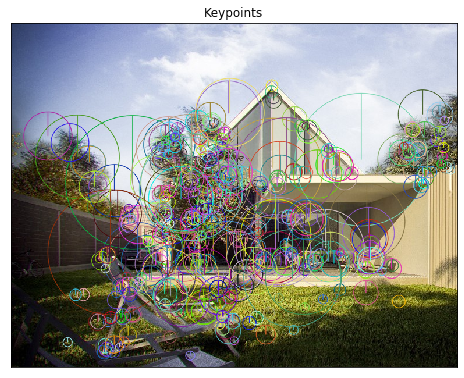

In [15]:
# Read the input image
image = cv2.imread('images/house.jpg')
    
# Define the threshold
threshold=3000

# Compute SURF features
kp, des = compute_surf_upright(image, threshold)

# Plot the keypoints
plot_keypoints(image, kp)

#### Observe the directions of the keypoints!

<font color=red>
Q3] Compute the ORB features and display the keypoints for the image "house.jpg".
</font>

$\textbf{ORB (Oriented Fast and Rotated Brief)}:$ A good alternative to SIFT and SURF in computation cost with matching performance. ORB is basically a fusion of FAST keypoint detector and BRIEF descriptor with many modifications to enhance the performance.

#### Function to compute ORB

In [16]:
def compute_ORB(img, n):

    # Initialize the ORB detector
    orb = cv2.ORB_create(nfeatures=n)

    # Find the keypoints with ORB
    kp = orb.detect(img)

    # Compute the descriptors with ORB
    kp, des = orb.compute(img, kp)
    
    return kp, des

#### Read the image, compute ORB and display the keypoints

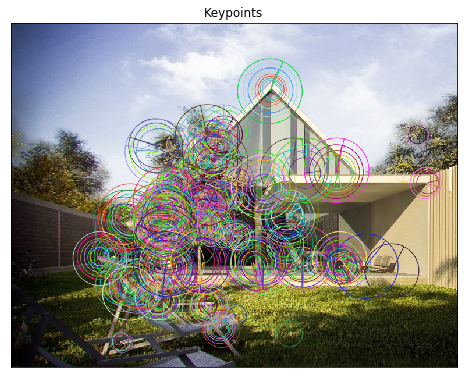

In [17]:
# Read the input image
image = cv2.imread('images/house.jpg')
    
# Define the no of features
n=500

# Compute ORB features
kp, des = compute_ORB(image, n)

# Plot the keypoints
plot_keypoints(image, kp)

In [18]:
# Find the no. of keypoints detected
num_kp = len(kp)
print("No of kepypoints detected =", num_kp)

No of kepypoints detected = 500


## 2] Face detection

$\textbf{Face detection}:$ Face detection is a computer vision technique to identify human faces within digital images. A lot of face detection techniques available today!

$\textbf{Viola-Jones face detection algorithm}:$ A general object detection framework that was able to provide competitive object detection rates in real time. It consists of 4 major steps:
- $\textbf{Selecting Haar-like features}:$ A Haar-like feature is represented by taking a rectangular part of an image and dividing that rectangle into multiple parts.
- $\textbf{Creating an integral image}:$ A quick and efficient way to calculate the sum of pixel values in an image or rectangular part of an image.
- $\textbf{Running AdaBoost training}:$ A set of weak learners create a single strong learner. Here, each Haar-like feature represents a weak learner and a strong boosted classifier is formed which contains the best performing weak classifiers.
- $\textbf{Creating classifier cascades}:$ Strong classifier s turned into a cascade where each weak classifier represents one stage. The job of the cascade is to quickly discard non-faces and avoid wasting computation time.

#### Function to detect faces

In [19]:
def detect_face(img, cascade_path):
    
    face_img = img.copy()
    
    # Load the cascade
    face_cascade = cv2.CascadeClassifier(cascade_path)
        
    # Detect faces
    face = face_cascade.detectMultiScale(face_img, 1.2, 4)

    # Draw rectangle around the faces
    for (x, y, w, h) in face:        
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 0, 0), 2)
              
    return face_img

#### Function to plot the images

In [20]:
def plot_images(im1, im2, t1='Input image', t2='Face detection'):
    
    fig = plt.figure(figsize=(10,10))
    im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, 1)
    plt.title(t1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(im1) 

    im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, 2)
    plt.title(t2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(im2) 
    
    plt.show()

#### Read the input image, detect face and display

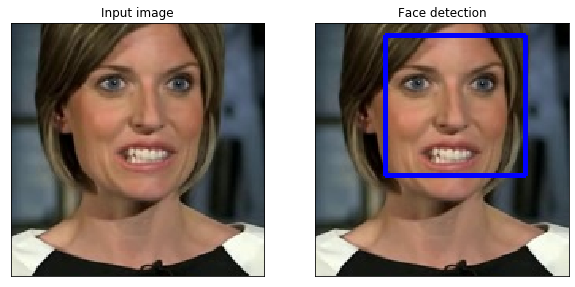

In [21]:
# Read the input image
image = cv2.imread('images/face.jpg')

# Specify the path to load the cascade file
cascade_path = 'images/haarcascade_frontalface_default.xml'

# Call the function to detect the face
face_img = detect_face(image, cascade_path)

# Plot the images
plot_images(image, face_img)

#### Try on multiple face image!

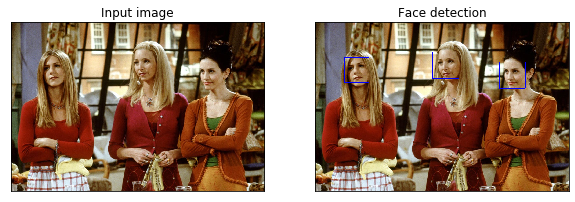

In [22]:
# Read the input image
image = cv2.imread('images/friends.jpg')

# Specify the path to load the cascade file
cascade_path = 'images/haarcascade_frontalface_default.xml'

# Call the function to detect the face
face_img = detect_face(image, cascade_path)

# Plot the images
plot_images(image, face_img)

## 3] Basics of video processing

## Video ↔ Images

<font color=red>
Q1] Write a program to convert a given video to its constituent images. Your output should be in a specified folder.
</font>

#### Function to extract the frames from the given video file

In [23]:
def extract_frames(filename):
    
    # Create the video capture object
    cap = cv2.VideoCapture(filename)

    # Initialization
    frames = []
    no_of_frames = 0
    
    while(cap.isOpened()):
        
        # Read the frame
        ret, frame = cap.read()
        
        if ret == False:
            break
        
        frames.append(frame)
        no_of_frames += 1
    
    cap.release() 
    
    print("Successfully extracted all the frames!!")
    print("Total no of frames = %d" % no_of_frames)
    
    return frames

#### Call the function to extract the frames from the input video

In [24]:
# input video path
input_video = 'images/video.mp4'

# Extract the frames
frames = extract_frames(input_video)

Successfully extracted all the frames!!
Total no of frames = 171


#### Save the frames in the specified folder

In [25]:
# Create the output directory
output_folder = 'outputs/frames'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    
# Save all the images
for i in range(len(frames)):
    fname = output_folder + '/' + str(i+1) + '.jpg'
    cv2.imwrite(fname, frames[i])

<font color=red>
Q2] Write a program that will merge a set of images in a folder into a single video. You should be able to  control the frame rate in the video that is created. 
</font>

#### Function to get the size of the image

In [26]:
def get_img_size(path):
    img = cv2.imread(path)
    height, width, layers = img.shape
    img_size = (width, height)
    
    return img_size

#### Function to generate the video from the input frames

In [27]:
def generate_video(frames_path, fname, fps=25):

    # Get all the files from the folder
    img_files = glob(os.path.join("{}/*.jpg".format(frames_path)))
    print("Total no of frames = %d" % len(img_files))
    
    # Sort the files
    img_files.sort(key = lambda x: int(x.split("/")[-1].split(".")[0]))
    
    # Get the size of images
    size = get_img_size(img_files[0])
    
    # Generate and save the output video
    video = cv2.VideoWriter(fname, cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
 
    for i in range(len(img_files)):
        frame = cv2.imread(img_files[i])
        video.write(frame)
    
    video.release()
    
    print("Successfully generated and saved the video!!")

#### Generate the video

In [28]:
frames_path = 'outputs/frames'
output_file_name = 'outputs/output_video.mp4'
fps = 25
generate_video(frames_path, output_file_name, fps)

Total no of frames = 171
Successfully generated and saved the video!!


<font color=red>
Q3] Capturing Images: Write a function to capture frames from a webcam connected to your computer and save them as images in a folder. You should also be able to display the frames on the screen while capturing. 
</font>

#### Function to plot the given image

In [29]:
def plot_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.show()

#### Function to capture frames from webcam

In [30]:
def extract_frames_webcam(output_folder):
    
    # Create the video capture object
    cap = cv2.VideoCapture(0)

    # Initialization
    frames = []
    no_of_frames = 0
    
    while(cap.isOpened()):
        
        # Read the frame
        ret, frame = cap.read()
        
        if ret == False or no_of_frames == 25:
            break
        
        frames.append(frame)
        no_of_frames += 1
        
        # Plot the frame
        plot_image(frame)
        
        # Save the frame
        fname = output_folder + '/' + str(no_of_frames) + '.jpg'
        cv2.imwrite(fname, frame)
        
    
    cap.release() 
    
    print("Successfully extracted all the frames!!")
    print("Total no of frames = %d" % no_of_frames)
    
    return frames

#### Capture the frames from the webcam

In [ ]:
output_folder = 'outputs/frames_webcam'
if not os.path.exists(output_folder):
    os.mkdir(output_folder)
frames = extract_frames_webcam(output_folder)

<font color=red>
Q4] For a given face video, extract all the frames, detect the faces and create a video with the detected faces.
</font>

#### Extract the frames from the video and detect the face in each frame

In [32]:
def extract_faces(filename, cascade_path, output_folder):
    
    # Create the video capture object
    cap = cv2.VideoCapture(filename)

    # Initialization
    faces = []
    no_of_frames = 0
    
    while(cap.isOpened()):
        
        # Extract the frame
        ret, frame = cap.read()
        
        if ret == False or no_of_frames==25:
            break
                
        # Detect faces
        face = detect_face(frame, cascade_path)
        faces.append(face)
        
        # Save the faces
        no_of_frames += 1
        fname = output_folder + '/' + str(no_of_frames) + '.jpg'
        cv2.imwrite(fname, face)
    
    cap.release() 
    
    print("Successfully extracted all the frames, detected faces and saved!!")
    print("Total no of frames = %d" % no_of_frames)
    
    return faces

#### Extract and save the detected faces

In [33]:
input_file = 'images/face_video.mp4'

output_folder = 'outputs/faces'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    
cascade_path = 'images/haarcascade_frontalface_default.xml'
faces = extract_faces(input_file, cascade_path, output_folder)

Successfully extracted all the frames, detected faces and saved!!
Total no of frames = 25


#### Generate the video of the detected faces

In [34]:
frames_path = 'outputs/faces'
output_file_name = 'outputs/output_face_video.mp4'
fps = 25
generate_video(frames_path, output_file_name, fps)

Total no of frames = 25
Successfully generated and saved the video!!


<font color=red>
Q5] Capture the video using webcam, extract all the frames, detect the faces and create a video with the detected faces.
</font>

#### Extract the frames from the video and detect the face in each frame

In [35]:
def extract_faces_webcam(cascade_path, output_folder):
    
    # Create the video capture object
    cap = cv2.VideoCapture(0)

    # Initialization
    faces = []
    no_of_frames = 0
    
    while(cap.isOpened()):
        
        # Extract the frame
        ret, frame = cap.read()
        
        if ret == False or no_of_frames==25:
            break
                
        # Detect faces
        face = detect_face(frame, cascade_path)
        faces.append(face)
        
        # Save the faces
        no_of_frames += 1
        fname = output_folder + '/' + str(no_of_frames) + '.jpg'
        cv2.imwrite(fname, face)
    
    cap.release() 
    
    print("Successfully extracted all the frames, detected faces and saved!!")
    print("Total no of frames = %d" % no_of_frames)
    
    return faces

#### Extract and save the detected faces

In [36]:
output_folder = 'outputs/faces_webcam'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    
cascade_path = 'images/haarcascade_frontalface_default.xml'
faces = extract_faces_webcam(cascade_path, output_folder)

Successfully extracted all the frames, detected faces and saved!!
Total no of frames = 25


#### Generate the video of the detected faces

In [37]:
frames_path = 'outputs/faces_webcam'
output_file_name = 'outputs/output_face_video_webcam.mp4'
fps = 25
generate_video(frames_path, output_file_name, fps)

Total no of frames = 25
Successfully generated and saved the video!!
